In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Reshaping the Images

Note that we have Images as 1D vector each containing 784 pixels. Before we feed the data to the CNN we must reshape the data into (28x28x1) 3D matrices.
This is because Keras wants an Extra Dimension in the end, for channels. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.

In [3]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out

X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [4]:
#Normalization is carried out as follows:

#x = (x - min) / (max - min) ; Here min=0 and max=255
X_train_cnn, X_test_cnn = X_train_cnn/255, X_test_cnn/255

In [5]:
X_train_cnn.shape

(60000, 28, 28, 1)

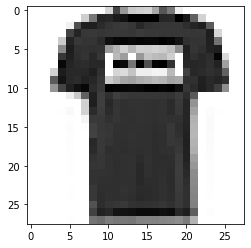

In [6]:
#Plot the First Image
plt.imshow(X_train_cnn[1], cmap = plt.cm.binary)

In [7]:
#Number of Unique Items
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
#Create Class Names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

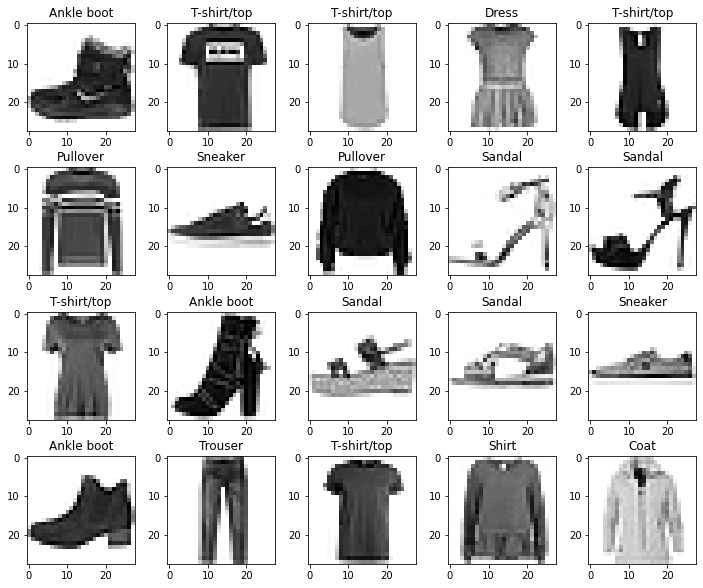

In [9]:
#Plot the First 20 Images from X_train
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(20):
  a = plot.add_subplot(4, 5, i + 1)
  a.imshow(X_train_cnn[i], cmap = plt.cm.binary)
  a.title.set_text(class_names[y_train[i]])

## Build the CNN Model

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=50, kernel_size=(5,5), activation="relu",strides=1,
                        kernel_initializer = 'he_uniform',padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

2022-08-25 09:05:12.529303: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Compiling the Model

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
model.fit(X_train_cnn, y_train, epochs=5, validation_split=0.15)

2022-08-25 09:05:13.227563: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1594/1594 [==============================] - 86s 53ms/step - loss: 0.7155 - accuracy: 0.7468 - val_loss: 0.3877 - val_accuracy: 0.8568
Epoch 2/5
1594/1594 [==============================] - 82s 52ms/step - loss: 0.4199 - accuracy: 0.8553 - val_loss: 0.3079 - val_accuracy: 0.8832
Epoch 3/5
1594/1594 [==============================] - 81s 51ms/step - loss: 0.3475 - accuracy: 0.8818 - val_loss: 0.2870 - val_accuracy: 0.8973
Epoch 4/5
1594/1594 [==============================] - 80s 50ms/step - loss: 0.2969 - accuracy: 0.8991 - val_loss: 0.2800 - val_accuracy: 0.9046
Epoch 5/5
1594/1594 [==============================] - 80s 50ms/step - loss: 0.2653 - accuracy: 0.9092 - val_loss: 0.2436 - val_accuracy: 0.9122


Text(0.5, 1.0, 'CNN Model: Loss - Epochs')

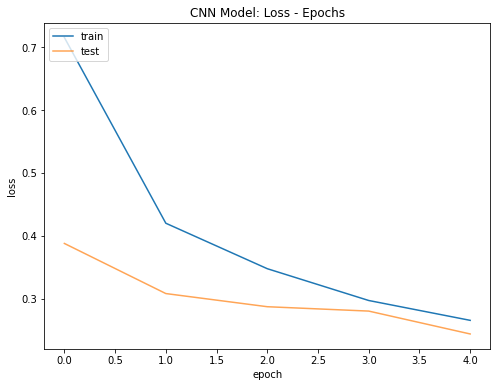

In [13]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model.history.history['loss'], label = 'train')
plt.plot(model.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Loss - Epochs')

Text(0.5, 1.0, 'CNN Model: Accuracy - Epochs')

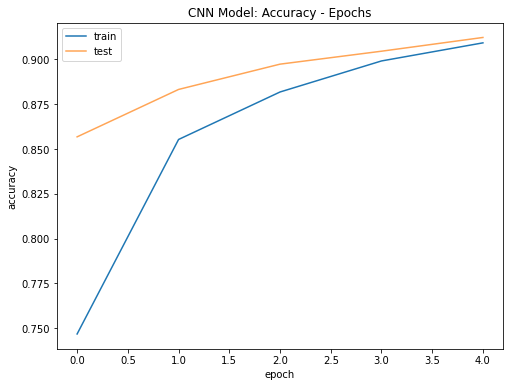

In [14]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model.history.history['accuracy'], label = 'train')
plt.plot(model.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Accuracy - Epochs')

In [15]:
#Model Evaluation on Test Dataset
model.evaluate(X_test_cnn, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2595 - accuracy: 0.9068


[0.2595164179801941, 0.9067999720573425]

In [16]:
#Predict on Test Dataset
y_pred_cnn = model.predict(X_test_cnn)

In [17]:
y_pred_cnn = np.argmax(y_pred_cnn, axis = 1)
y_pred_cnn

array([9, 2, 1, ..., 8, 1, 5])

In [18]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_cnn) * 100

90.68

In [19]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cnn)

array([[886,   0,  11,  25,   2,   1,  72,   0,   3,   0],
       [  1, 973,   0,  20,   2,   0,   3,   0,   1,   0],
       [ 16,   0, 854,  10,  68,   0,  50,   0,   2,   0],
       [ 19,   1,   9, 934,  17,   0,  18,   0,   1,   1],
       [  0,   0,  48,  47, 854,   0,  51,   0,   0,   0],
       [  0,   0,   0,   0,   0, 979,   0,   8,   0,  13],
       [151,   0,  79,  36,  75,   0, 654,   0,   5,   0],
       [  0,   0,   0,   0,   0,   7,   0, 976,   0,  17],
       [  2,   0,   0,   6,   0,   1,   3,   1, 987,   0],
       [  0,   0,   1,   0,   0,   4,   0,  24,   0, 971]])